# Load the data and prepare it for further analysis
Parse the CSV files within the ../results folder and load them into data frames.
Preprocess the data frames by ensuring that all data frames have the following column names: 
- 'doi':
- 'url':
- 'title':
- 'abstract': 
- 'bibtex':
- 'source':
- 'year':

In [54]:
from pathlib import Path

import pandas as pd

RESULTS_FOLDER = Path("../results/")


    

# load the data frames
df_arxiv = pd.read_csv(RESULTS_FOLDER / 'arxiv_2024-06-26_14-50-21.csv')
df_springer = pd.read_csv(RESULTS_FOLDER / 'springer_2024-06-26_14-45-54-Fixed.csv')
df_ieee = pd.read_csv(RESULTS_FOLDER / 'IEEE_export2024.06.26-16.05.03.csv')
df_acm = pd.read_csv(RESULTS_FOLDER / 'acm_export2024.06.26-17.35.csv')
df_science_direct = pd.read_csv(RESULTS_FOLDER / 'ScienceDirect_2024-06-26_17-18-04.csv')
df_web_of_science = pd.read_csv(RESULTS_FOLDER / 'webofscience_2024-06-26_16-57-54.csv')
df_acl = pd.read_csv(RESULTS_FOLDER / 'ACL_2024-07-02-Fixed.csv')
df_scopus = pd.read_csv(RESULTS_FOLDER / 'Scopus_2024-07-02.csv')

# add source to all data frames
df_arxiv['source'] = 'arxiv'
df_springer['source'] = 'springer'
df_ieee['source'] = 'ieee'
df_acm['source'] = 'acm'
df_science_direct['source'] = 'science_direct'
df_web_of_science['source'] = 'web_of_science'
df_acl['source'] = 'acl'
df_scopus['source'] = 'scopus'

# ensure all frames have a title
df_ieee = df_ieee.rename(columns={'Document Title': 'title'})
df_web_of_science = df_web_of_science.rename(columns={'Article Title': 'title'})

# ensure all frames have a doi column and are of type string
df_arxiv['doi'] = df_arxiv['doi'].fillna("").astype(str)
df_springer['doi'] = df_springer['DOI'].fillna("").astype(str)
df_ieee['doi'] = df_ieee['DOI'].fillna("").astype(str)
df_acm['doi'] = df_acm['doi'].fillna("").astype(str)
df_science_direct['doi'] = df_science_direct['doi'].fillna("").astype(str)
df_web_of_science['doi'] = df_web_of_science['DOI'].fillna("").astype(str)
df_acl['doi'] = df_acl['doi'].fillna("").astype(str)
df_scopus['doi'] = df_scopus['doi'].fillna("").astype(str)


# ensure all frames have a URL column 
df_springer['url'] = df_springer['link'].apply(lambda x: x if "link.springer.com" in x else "https://link.springer.com" + x)
df_ieee = df_ieee.rename(columns={'PDF Link': 'url'})
df_web_of_science = df_web_of_science.rename(columns={'DOI Link': 'url'})

# ensure all frames have an abstract column
df_ieee = df_ieee.rename(columns={'Abstract': 'abstract'})
df_web_of_science = df_web_of_science.rename(columns={'Abstract': 'abstract'})

# ensure all frames have a bibtex column
df_springer['bibtex'] = None

# add year column to data frames if not present
df_arxiv['year'] = df_arxiv['published'].apply(lambda x: x.split("-")[0].strip())
df_springer['year'] = df_springer['published'].apply(lambda x: x.split(" ")[-1].strip())
df_ieee['year'] = df_ieee['Publication Year'].apply(lambda x: str(x).strip())
df_science_direct['year'] = df_science_direct['year'].astype(str)
df_acm['year'] = df_acm['year'].astype(str)
df_web_of_science['year'] = df_web_of_science['Publication Year'].apply(lambda x: str(x).strip())
df_acl['year'] = df_acl['year'].astype(str) 
df_scopus['year'] = df_scopus['year'].astype(str)

# print the headers of each data frame
# print("ArXiv columns: ", df_arxiv.columns)
# print("Springer columns: ", df_springer.columns)
# print("IEEE columns: ", df_ieee.columns)
# print("ACM columns: ", df_acm.columns)
# print("Science Direct columns: ", df_science_direct.columns)
# print("Web of Science columns: ", df_web_of_science.columns)
# print("ACL columns: ", df_acl.columns)
# print("Scopus columns: ", df_scopus.columns)


Science Direct columns:  Index(['title', 'journal', 'volume', 'pages', 'year', 'issn', 'doi', 'url',
       'author', 'keywords', 'abstract', 'type', 'number', 'note', 'editor',
       'booktitle', 'publisher', 'series', 'isbn', 'address', 'edition',
       'source'],
      dtype='object')
Web of Science columns:  Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, W

In [46]:




# print counts
print(f"ArXiv # papers: {df_arxiv.shape}")
print(f"Springer # papers: {df_springer.shape}")
print(f"IEEE # papers: {df_ieee.shape}")
print(f"ACM # papers: {df_acm.shape}")
print(f"Science Direct # papers: {df_science_direct.shape}")
print(f"Web of Science # papers: {df_web_of_science.shape}")
print(f"ACL # papers: {df_acl.shape}")
print(f"Scopus # papers: {df_scopus.shape}")

# compute the totals across all sources
df_all = pd.concat([df_arxiv, df_springer, df_ieee, df_acm, df_science_direct, df_web_of_science, df_acl, df_scopus])
# sum
print(f"Total # papers: {df_all.shape}")



ArXiv # papers: (162, 8)
Springer # papers: (241, 10)
IEEE # papers: (73, 30)
ACM # papers: (1013, 27)
Science Direct # papers: (387, 22)
Web of Science # papers: (74, 74)
ACL # papers: (79, 9)
Scopus # papers: (193, 9)
Total # papers: (2222, 120)
Index(['doi', 'url', 'title', 'abstract', 'published', 'bibtex', 'source',
       'year'],
      dtype='object')
Index(['title', 'published', 'link', 'DOI', 'authors', 'content_type',
       'abstract', 'source', 'url', 'year'],
      dtype='object')
Index(['title', 'Authors', 'Author Affiliations', 'Publication Title',
       'Date Added To Xplore', 'Publication Year', 'Volume', 'Issue',
       'Start Page', 'End Page', 'Abstract', 'ISSN', 'ISBNs', 'DOI',
       'Funding Information', 'url', 'Author Keywords', 'IEEE Terms',
       'Mesh_Terms', 'Article Citation Count', 'Patent Citation Count',
       'Reference Count', 'License', 'Online Date', 'Issue Date',
       'Meeting Date', 'Publisher', 'Document Identifier', 'source', 'year'],
     

# Visualize results and raw data

## Visualize the datasets (papers / year)

In [37]:
# count numbers of papers per year
df_arxiv_year = df_arxiv.groupby('year').count()
df_springer_year = df_springer.groupby('year').count()
df_ieee_year = df_ieee.groupby('year').count()
df_acm_year = df_acm.groupby('year').count()
df_science_direct_year = df_science_direct.groupby('year').count()
df_web_of_science_year = df_web_of_science.groupby('year').count()
df_acl_year = df_acl.groupby('year').count()
df_scopus_year = df_scopus.groupby('year').count()

# remove unnecessary columns
df_arxiv_year = df_arxiv_year[['title']]
df_springer_year = df_springer_year[['title']]
df_ieee_year = df_ieee_year[['Document Title']]
df_acm_year = df_acm_year[['title']]
df_acl_year = df_acl_year[['title']]
df_scopus_year = df_scopus_year[['title']]
df_science_direct_year = df_science_direct_year[['title']]
df_web_of_science_year = df_web_of_science_year[['Article Title']]
df_web_of_science_year = df_web_of_science_year.rename(columns={'Article Title': 'title'})
df_ieee_year = df_ieee_year.rename(columns={'Document Title': 'title'})


# merge the counts
df_arxiv_year = df_arxiv_year.rename(columns={'title': 'arxiv'})
df_springer_year = df_springer_year.rename(columns={'title': 'springer'})
df_ieee_year = df_ieee_year.rename(columns={'title': 'ieee'})
df_acm_year = df_acm_year.rename(columns={'title': 'acm'})
df_science_direct_year = df_science_direct_year.rename(columns={'title': 'science_direct'})
df_web_of_science_year = df_web_of_science_year.rename(columns={'title': 'web_of_science'})
df_acl_year = df_acl_year.rename(columns={'title': 'acl'})
df_scopus_year = df_scopus_year.rename(columns={'title': 'scopus'})

df_merged = pd.concat([df_arxiv_year['arxiv'], df_springer_year['springer'], df_ieee_year['ieee'], df_acm_year['acm'],
                       df_science_direct_year['science_direct'], df_web_of_science_year['web_of_science'],
                       df_acl_year['acl'], df_scopus_year['scopus']],
                      axis=1)
df_merged = df_merged.fillna(0)
df_merged = df_merged.astype(int)

# sort the years
df_merged = df_merged.sort_index()
df_merged

,arxiv,springer,ieee,acm,science_direct,web_of_science,acl,scopus
year,,,,,,,,
1948,0,0,0,0,0,0,0,1
1972,0,0,0,1,0,0,0,0
1973,0,0,0,1,0,0,0,0
1977,0,0,0,1,0,0,0,0
1978,0,0,0,0,1,0,0,0
1981,0,0,0,1,2,0,0,0
1982,0,2,0,0,2,0,0,0
1984,0,0,0,0,1,0,0,0
1985,0,1,0,0,0,0,0,0


In [41]:
# count the number of papers whose year >= N
df_merged['total'] = df_merged['arxiv'] + df_merged['springer'] + df_merged['ieee'] + df_merged['acm'] + df_merged[
    'science_direct'] + df_merged['web_of_science'] + df_merged['acl'] + df_merged['scopus']
all = df_merged['total'].sum()
cut_off_year = 2019
after_cut_off_year = df_merged.loc[df_merged.index.astype(int) >= cut_off_year].sum()
print(f"Total number of papers: {all}")
print(f"Number of papers after {cut_off_year}: {after_cut_off_year['total']}")

Total number of papers: 2215
Number of papers after 2019: 2082


<Axes: title={'center': 'Number of papers per year'}, xlabel='year'>

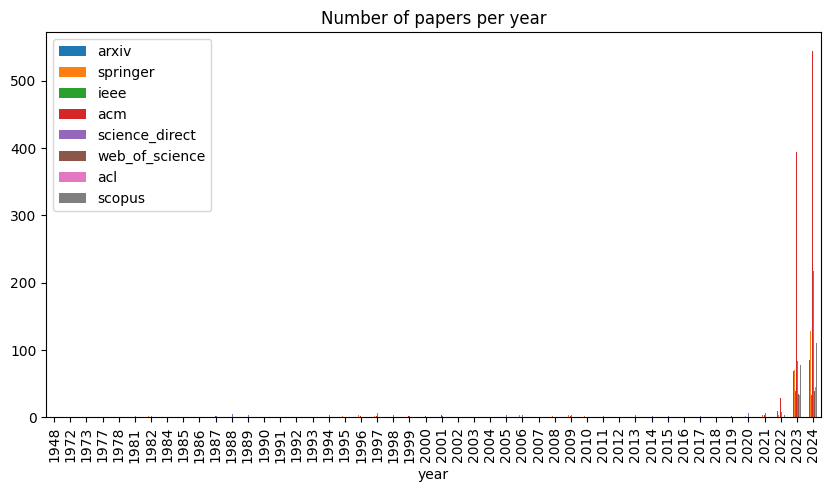

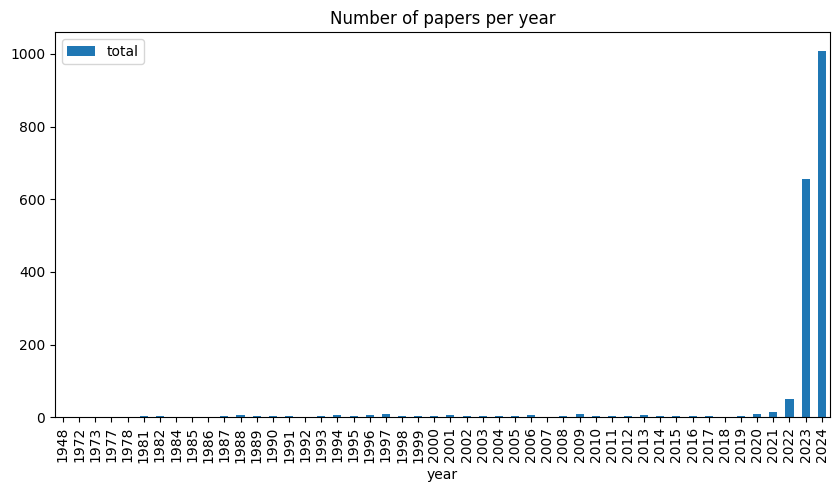

In [23]:
# exclude total column & plot
df_merged.drop(columns=['total']).loc[df_merged.index.astype(int) >= 1].plot(kind='bar', figsize=(10, 5),
                                                                             title='Number of papers per year')

df_merged[['total']].loc[df_merged.index.astype(int) >= 1].plot(kind='bar', figsize=(10, 5),
                                                                             title='Number of papers per year')

## Merge the data frames
This will merge the data frames and remove duplicates.
We will keep only the columns:
- title
- doi
- year
- source
- url

In [42]:
# compute subset of the data frames
df_arxiv_subset = df_arxiv[['title', 'doi', 'year', 'source', 'url']]
df_springer_subset = df_springer[['title', 'DOI', 'year', 'source', 'url']]
df_ieee_subset = df_ieee[['Document Title', 'DOI', 'year', 'source', 'url']]
df_acm_subset = df_acm[['title', 'doi', 'year', 'source', 'url']]
df_science_direct_subset = df_science_direct[['title', 'doi', 'year', 'source', 'url']]
df_web_of_science_subset = df_web_of_science[['Article Title', 'DOI', 'year', 'source', 'url']]
df_acl_subset = df_acl[['title', 'doi', 'year', 'source', 'url']]
df_scopus_subset = df_scopus[['title', 'doi', 'year', 'source', 'url']]

#  apply any needed column renaming
df_springer_subset = df_springer_subset.rename(columns={'DOI': 'doi'})
df_ieee_subset = df_ieee_subset.rename(columns={'Document Title': 'title', 'DOI': 'doi'})
df_web_of_science_subset = df_web_of_science_subset.rename(columns={'Article Title': 'title', 'DOI': 'doi'})

# merge the data frames
df_merged_subset = pd.concat(
    [df_arxiv_subset, df_springer_subset, df_ieee_subset, df_acm_subset, df_science_direct_subset,
     df_web_of_science_subset, df_acl_subset, df_scopus_subset], ignore_index=True)

# remove duplicates, but merge the source field to be a concatenation of the duplicated row values
df_merged_subset = df_merged_subset.groupby('title').agg(
    {'doi': 'first', 'year': 'first', 'source': ', '.join, 'url': 'first'}).reset_index()
df_merged_subset = df_merged_subset.drop_duplicates(subset=['title'])
# now by DOI
df_merged_subset = df_merged_subset.groupby('doi').agg(
    {'title': 'first', 'year': 'first', 'source': ', '.join, 'url': 'first'}).reset_index()
df_merged_subset = df_merged_subset.drop_duplicates(subset=['doi'])

# save to CSV starting index from 1
df_merged_subset.index = range(1, len(df_merged_subset) + 1)
# name the column index as id
df_merged_subset.index.name = 'id'
# create default values 
df_merged_subset['bibtex_id'] = None
df_merged_subset['type'] = None
df_merged_subset['is_relevant'] = None

df_merged_subset = df_merged_subset[['title', 'bibtex_id', 'url', 'type', 'doi', 'is_relevant', 'source', 'year']]
#                                     
df_merged_subset.to_csv("../results/llm_education_survey_paper.csv", index=True)

df_merged_subset

(2222, 5)


,title,bibtex_id,url,type,doi,is_relevant,source,year
id,,,,,,,,
1,Examples and tutorials on using Google Colab a...,None,https://www.scopus.com/inward/record.uri?partn...,None,10.1002/cae.22729,None,scopus,2024
2,Safety Case Practice - Meet the Challenge,None,https://link.springer.com/chapter/10.1007/1-84...,None,10.1007/1-84628-447-3_5,None,springer,2006
3,Determination of Storage Locations for Incomin...,None,https://link.springer.com/chapter/10.1007/1177...,None,10.1007/11779568_123,None,springer,2006
4,Towards a Digital Library for Language Learning,None,https://link.springer.com/chapter/10.1007/1186...,None,10.1007/11863878_29,None,springer,2006
5,Measuring Core Inflation by Multivariate Struc...,None,https://link.springer.com/chapter/10.1007/3-54...,None,10.1007/3-540-36626-1_10,None,springer,2007
...,...,...,...,...,...,...,...,...
1603,Towards a modular architecture for science fac...,None,https://www.sciencedirect.com/science/article/...,None,https://doi.org/10.1039/d3dd00142c,None,science_direct,2023
1604,What is missing in autonomous discovery: open ...,None,https://www.sciencedirect.com/science/article/...,None,https://doi.org/10.1039/d3dd00143a,None,science_direct,2023
1605,MaScQA: investigating materials science knowle...,None,https://www.sciencedirect.com/science/article/...,None,https://doi.org/10.1039/d3dd00188a,None,science_direct,2024


In [25]:
# find papers with the keyword 'survey' in the title (case-insensitive search)
df_surveys = df_merged_subset[df_merged_subset['title'].str.contains('survey', case=False, na=False)]
df_surveys

,title,bibtex_id,url,type,doi,is_relevant,source,year
id,,,,,,,,
121,Value-Based Adoption of ChatGPT in Agile Softw...,None,https://link.springer.com/chapter/10.1007/978-...,None,10.1007/978-3-031-55642-5_12,None,springer,2024
182,A survey on sentiment analysis and its applica...,None,https://link.springer.com/article/10.1007/s005...,None,10.1007/s00521-023-08941-y,None,springer,2023
189,Situational Data Integration in Question Answe...,None,https://link.springer.com/article/10.1007/s101...,None,10.1007/s10115-024-02136-0,None,springer,2024
201,A survey of safety and trustworthiness of larg...,None,https://link.springer.com/article/10.1007/s104...,None,10.1007/s10462-024-10824-0,None,springer,2024
236,A survey on large language model based autonom...,None,https://link.springer.com/article/10.1007/s117...,None,10.1007/s11704-024-40231-1,None,springer,2024
248,A Large Language Model Approach to Educational...,None,https://link.springer.com/article/10.1007/s405...,None,10.1007/s40593-024-00414-0,None,springer,2024
330,Large Language Models for Software Engineering...,None,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,None,10.1109/ICSE-FoSE59343.2023.00008,None,"ieee, web_of_science, scopus",2023
383,Information storage and retrieval: a survey an...,None,https://doi.org/10.1145/1095515.1095516,None,10.1145/1095515.1095516,None,acm,1977
583,Moving From Narrative to Interactive Multi-Mod...,None,https://doi.org/10.1145/3610288,None,10.1145/3610288,None,acm,2023
